In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt 

In [10]:
sns.set_theme(style="ticks", palette="pastel")

transactions = pd.read_csv('data/transactions_train.csv')
articles = pd.read_csv('data/articles.csv')
customers = pd.read_csv('data/customers.csv')

### Analise dos dados

#### Transactions

In [11]:
transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [12]:
transactions.dtypes

t_dat                object
customer_id          object
article_id            int64
price               float64
sales_channel_id      int64
dtype: object

t_dat: data da transação `Date` (categórico nominal)

customer_id: id do cliente que fez a transação `String` (categórico nominal)

article_id: id do produto (artigo) comprado na transação `int64` (quantitativo discretos)

price: preço do produto comprado `float64` (quantitativo contínuo)

sales_channel_id: canal de vendas utilizado na transação (1 ou 2) `Int64` (quantitativo discreto e bináris simétrico)

In [13]:
transactions['sales_channel_id'] = transactions['sales_channel_id'].astype(np.int8)
transactions.dtypes

t_dat                object
customer_id          object
article_id            int64
price               float64
sales_channel_id       int8
dtype: object

In [19]:
transactions.isnull().sum()

t_dat               0
customer_id         0
article_id          0
price               0
sales_channel_id    0
dtype: int64

Não possui valores nulos

In [33]:
pd.get_dummies(transactions["sales_channel_id"]).head()

,1,2
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [34]:
display(transactions['customer_id'].describe())
display(transactions['customer_id'].value_counts())

count                                              31788324
unique                                              1362281
top       be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee9...
freq                                                   1895
Name: customer_id, dtype: object

be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee985513d9e8e53c6d91b    1895
b4db5e5259234574edfff958e170fe3a5e13b6f146752ca066abca3c156acc71    1441
49beaacac0c7801c2ce2d189efe525fe80b5d37e46ed05b50a4cd88e34d0748f    1364
a65f77281a528bf5c1e9f270141d601d116e1df33bf9df512f495ee06647a9cc    1361
cd04ec2726dd58a8c753e0d6423e57716fd9ebcf2f14ed6012e7e5bea016b4d6    1237
                                                                    ... 
63b70b71291668f0a63ade8e321fb3eccb80eba164f2087dad471de065f18e1f       1
950b172c36d169bf427545991fe66371f21a085799b44780fdcb2da6a3091613       1
7c284f13f4af9d6a53f97279381638ed0cb7afaa4fd4f3eaadc21993ea45fc69       1
62d49d0ae11a4f65fa31e354cb87f6b557ebec648e0e5e71435d2dd190d1ccc4       1
268eaa31a07d6f2f4f060bfcf32a660f3ea3dbb21ef14cd09fc2545f4e0b5c10       1
Name: customer_id, Length: 1362281, dtype: int64

In [21]:
max_x = transactions['t_dat'].max()
min_x = transactions['t_dat'].min()
print(f"Max: {max_x}\nMin: {min_x}")

Max: 2020-09-22
Min: 2018-09-20


Dados de transações em um intervalo de 2 anos e 2 dias

#### Articles

In [20]:
articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [21]:
articles.isnull().sum()

article_id                        0
product_code                      0
prod_name                         0
product_type_no                   0
product_type_name                 0
product_group_name                0
graphical_appearance_no           0
graphical_appearance_name         0
colour_group_code                 0
colour_group_name                 0
perceived_colour_value_id         0
perceived_colour_value_name       0
perceived_colour_master_id        0
perceived_colour_master_name      0
department_no                     0
department_name                   0
index_code                        0
index_name                        0
index_group_no                    0
index_group_name                  0
section_no                        0
section_name                      0
garment_group_no                  0
garment_group_name                0
detail_desc                     416
dtype: int64

#### Customers

In [22]:
customers.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [22]:
customers.dtypes

customer_id                object
FN                        float64
Active                    float64
club_member_status         object
fashion_news_frequency     object
age                       float64
postal_code                object
dtype: object

customer_id: id do cliente `String` (categórico nominal)

FN: ... `int` (quantitativo discreto e binário assimétrico)

Active: indicação se o cliente é ou não ativo `int` (quantitativo discreto e binário assimétrico)

club_member_status: status do cliente no clube de membros [ACTIVE, LEFT CLUB,PRE-CREATE] `String` (categórico nominal)

fashion_news_frequency: frequencia de acompanhamento de nótivias da moda [Monthly e Regularly] `String` (categórico ordinal)

age: idade do cliente `float64` (quantitativo contínuo)

postal_code: codigo postal do cliente criptografado `String` (categórico nominal)

In [23]:
customers.shape

(1371980, 7)

In [24]:
customers.isnull().sum()

customer_id                    0
FN                        895050
Active                    907576
club_member_status          6062
fashion_news_frequency     16009
age                        15861
postal_code                    0
dtype: int64

[Text(0.5, 1.0, 'Vizualização de dados nulos')]

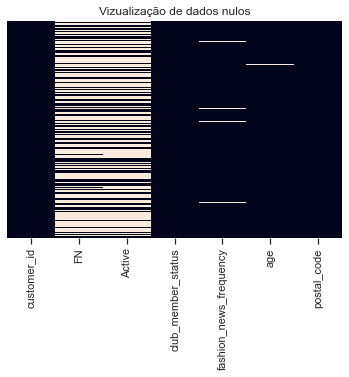

In [23]:
sns.heatmap(customers.isnull(),yticklabels=False,cbar=False).set(title='Vizualização de dados nulos')

In [32]:
pd.get_dummies(customers["FN"]).head()

,1.0
0,0
1,0
2,0
3,0
4,1


In [31]:
pd.get_dummies(customers["Active"]).head()

,1.0
0,0
1,0
2,0
3,0
4,1


In [30]:
pd.get_dummies(customers["fashion_news_frequency"]).head()

,Monthly,NONE,None,Regularly
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,1


In [29]:
pd.get_dummies(customers["club_member_status"]).head()

,ACTIVE,LEFT CLUB,PRE-CREATE
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


# Transformações

In [43]:
#Transformando ids em números inteiros
dt_transactions = transactions.copy()
dt_articles = articles.copy()
dt_customers = customers.copy()

dt_transactions['customer_id'] = dt_transactions[['customer_id']].apply(LabelEncoder().fit_transform)
dt_transactions['article_id'] = dt_transactions[['article_id']].apply(LabelEncoder().fit_transform)
dt_customers['customer_id'] = dt_customers[['customer_id']].apply(LabelEncoder().fit_transform)
dt_articles['article_id'] = dt_articles[['article_id']].apply(LabelEncoder().fit_transform)


In [44]:
dt_transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,2,40140,0.050831,2
1,2018-09-20,2,10505,0.030492,2
2,2018-09-20,7,6377,0.015237,2
3,2018-09-20,7,46256,0.016932,2
4,2018-09-20,7,46257,0.016932,2


In [45]:
dt_customers.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,0,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,1,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,2,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,3,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,4,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [48]:
dt_articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,0,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,1,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,2,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,3,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,4,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


![image](https://miro.medium.com/max/1400/1*0FDsAB9OelxojfmtkcLbgw.png)

In [52]:
transactions_join_customers = pd.merge(dt_transactions, dt_customers, how = 'outer')

In [53]:
transactions_join_customers.head()

,t_dat,customer_id,article_id,price,sales_channel_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,2018-09-20,2,40140.0,0.050831,2.0,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
1,2018-09-20,2,10505.0,0.030492,2.0,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
2,2018-09-24,2,40140.0,0.050831,2.0,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,2019-03-01,2,18172.0,0.013542,2.0,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
4,2020-02-03,2,59394.0,0.025407,2.0,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...


In [54]:
dt = pd.merge(transactions_join_customers, dt_articles, how = 'outer')

In [55]:
dt.head()

,t_dat,customer_id,article_id,price,sales_channel_id,FN,Active,club_member_status,fashion_news_frequency,age,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,2018-09-20,2.0,40140.0,0.050831,2.0,NaN,NaN,ACTIVE,NONE,24.0,...,Woven Occasion,A,Ladieswear,1.0,Ladieswear,14.0,Womens Premium,1013.0,Dresses Ladies,Sleeveless satin top with ties that create a d...
1,2018-09-24,2.0,40140.0,0.050831,2.0,NaN,NaN,ACTIVE,NONE,24.0,...,Woven Occasion,A,Ladieswear,1.0,Ladieswear,14.0,Womens Premium,1013.0,Dresses Ladies,Sleeveless satin top with ties that create a d...
2,2018-11-05,103925.0,40140.0,0.050831,2.0,NaN,NaN,ACTIVE,NONE,30.0,...,Woven Occasion,A,Ladieswear,1.0,Ladieswear,14.0,Womens Premium,1013.0,Dresses Ladies,Sleeveless satin top with ties that create a d...
3,2018-11-05,103925.0,40140.0,0.050831,2.0,NaN,NaN,ACTIVE,NONE,30.0,...,Woven Occasion,A,Ladieswear,1.0,Ladieswear,14.0,Womens Premium,1013.0,Dresses Ladies,Sleeveless satin top with ties that create a d...
4,2018-09-20,289798.0,40140.0,0.049475,2.0,1.0,1.0,ACTIVE,Regularly,48.0,...,Woven Occasion,A,Ladieswear,1.0,Ladieswear,14.0,Womens Premium,1013.0,Dresses Ladies,Sleeveless satin top with ties that create a d...
